# General Import

In [59]:
import re
import csv
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as bs

# 0. Function

## 0.1 Web Scraping for Tables

In [60]:
def save_html(html, path):
    with open(path, 'wb') as file_write:
        file_write.write(html)


def making_soup(url, empty_list):
    
    req_page = requests.get(url)
    my_soup = bs(req_page.content, 'html.parser')
    soup_list = my_soup.findAll("table")
    
    for tbody in soup_list:
        result1 = tbody.find_all("tr")
        for tr in result1:
            result2 = tbody.find_all("td")
            row_info = tr.text.split('\n')
            empty_list.append(row_info)
            
    return empty_list

## 0.2 Splitting Table

In [61]:
def split_table(current_num, movie_master, movie_split):
    current_num = current_num + 1
    
    while current_num < len(movie_master) and len(movie_master[current_num]) > 2:
        movie_split.append(movie_master[current_num])
        
        if len(movie_master[current_num]) == 1:
            print(current_num)
            break
        
        current_num = current_num + 1
        
    return movie_split, current_num

## 0.3 CSV Creation

In [62]:
def write_csv(output_name, movie_split):
    with open(output_name, "w", newline = "", encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerows(movie_split)

## 0.4 Data Frame to CSV

In [63]:
def making_table(csv_file, column_start, column_end, name_list):
    dst = pd.read_csv(csv_file, header = None, index_col = False)
    dst = dst.iloc[:,column_start:column_end].values
    dst_movie = pd.DataFrame(dst, columns = [name_list])
    
    return dst_movie

## 0.5 Value Conversion

In [64]:
def spchar_removal(array, starting_column, name_list):
    Lrow = len(array)
    Lcol = len(array[0])
    
    current_row = 0
    current_column = starting_column
    
    while current_column < Lcol:
        current_row = 0
        while current_row < Lrow:
            array[current_row, current_column] = re.sub(r",", "", array[current_row, current_column])
            array[current_row, current_column] = re.sub(r"\$", "", array[current_row, current_column])
            array[current_row, current_column] = re.sub(r"%", "", array[current_row, current_column])
            current_row = current_row + 1
        
        current_column = current_column + 1
        
    dst_movie = pd.DataFrame(array, columns = [name_list])
    
    return dst_movie

## 0.6 Pie Chart Percentage

In [65]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return '{p:.2f}%'.format(p = pct, v = val)
    return my_autopct

# 1. Web Scraping

## 1.1 Web Scraping from 2 Sites

In [92]:
url = 'https://www.the-numbers.com/movies/production-countries/#tab=territory'
country = []
country = making_soup(url, country)

url = 'https://www.the-numbers.com/market/'
movie = []
movie = making_soup(url, movie)

url = 'https://www.the-numbers.com/market/genres'
genre = []
genre = making_soup(url, genre)

## 1.2 Splitting the Tables

In [94]:
empty_list = [] 
movie1, current_num = split_table(0, movie, empty_list)
empty_list = [] 
movie2, current_num = split_table(current_num, movie, empty_list)
empty_list = [] 
movie3, current_num = split_table(current_num, movie, empty_list)
empty_list = [] 
movie4, current_num = split_table(current_num, movie, empty_list)
empty_list = [] 
movie5, current_num = split_table(current_num, movie, empty_list)
empty_list = [] 
movie6, current_num = split_table(current_num, movie, empty_list)
empty_list = [] 
movie7, current_num = split_table(current_num, movie, empty_list)
empty_list = [] 
movie8, current_num = split_table(current_num, movie, empty_list)
empty_list = [] 
movie9, current_num = split_table(current_num, movie, empty_list)
empty_list = [] 
genre, current_num = split_table(0, genre, empty_list)
empty_list = [] 
country, current_num = split_table(0, country, empty_list)

## 1.3 CSV Creation 

In [95]:
output_name = 'Annual Ticket Sales.csv'
write_csv(output_name, movie1)
output_name = 'Number of Wide Releases Each Year.csv'
write_csv(output_name, movie2)
output_name = 'Top Movie of Each Year.csv'
write_csv(output_name, movie3)
output_name = 'Top-Grossing Distributors 1995 to 2021.csv'
write_csv(output_name, movie4)
output_name = 'Top-Grossing Genres 1995 to 2021.csv'
write_csv(output_name, genre)
output_name = 'Top-Grossing MPAA Ratings 1995 to 2021.csv'
write_csv(output_name, movie6)
output_name = 'Top-Grossing Sources 1995 to 2021.csv'
write_csv(output_name, movie7)
output_name = 'Top-Grossing Production Methods 1995 to 2021.csv'
write_csv(output_name, movie8)
output_name = 'Top-Grossing Creative Types 1995 to 2021.csv'
write_csv(output_name, movie9)
output_name = 'Movie Production Countries.csv'
write_csv(output_name, country)

## 2. Data Presentation

### 2.1 Movie Prodcution Countries

In [8]:
csv_file = 'Movie Production Countries.csv'
name_list = ['Country', 'No. of Movies', 'Average Production Budget ($)', 'Total Worldwide Box Office ($)']
country_prod = making_table(csv_file, 1, 5, name_list)

In [9]:
country_prod = country_prod.drop(country_prod.index[15:])

In [10]:
temp = country_prod.to_numpy()
country_prod = spchar_removal(temp, 1, name_list)

In [11]:
country_prod['No. of Movies'] = country_prod['No. of Movies'].astype(int)
country_prod['Average Production Budget ($)'] = country_prod['Average Production Budget ($)'].astype(np.int64)
country_prod['Total Worldwide Box Office ($)'] = country_prod['Total Worldwide Box Office ($)'].astype(np.int64)
country_prod.dtypes

Country                           object
No. of Movies                      int32
Average Production Budget ($)      int64
Total Worldwide Box Office ($)     int64
dtype: object

In [12]:
country_prod

,Country,No. of Movies,Average Production Budget ($),Total Worldwide Box Office ($)
0,United States,20876,36492344,587825261664
1,United Kingdom,3609,30499823,51849409108
2,China,1936,34963077,36260590749
3,France,3052,22864946,20581170000
4,Japan,1367,28802676,14803261273
5,Germany,1457,30575346,10632658672
6,Republic of Korea,1122,17373000,8322589438
7,Canada,1582,20447825,7950361157
8,Australia,779,29343607,7670130896
9,India,1761,15036300,7515605361


In [17]:
temp = []

x = []
temp = country_prod['Country'].to_numpy()
x = np.append(temp, x)
y1 = []
temp = country_prod['No. of Movies'].to_numpy()
y1 = np.append(temp, y1)

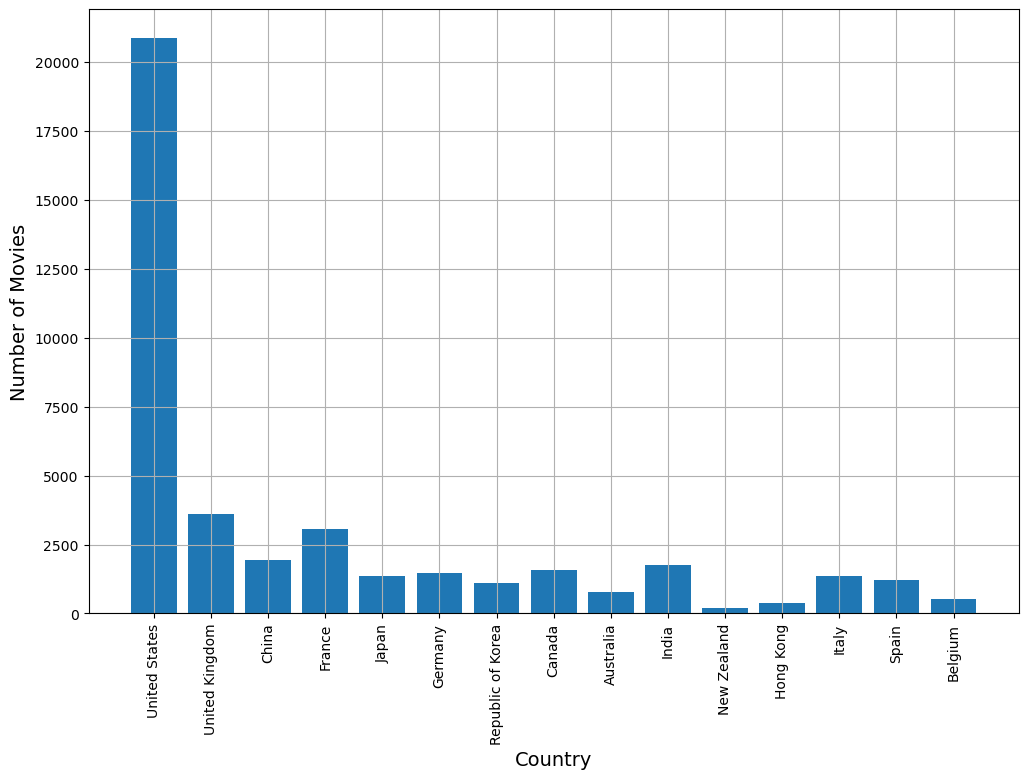

In [265]:
plt.figure(figsize = (12, 8), dpi= 100)
plt.bar(x, y1)
plt.title('Number of Movies vs Country', fontsize = 14)
plt.xlabel("Country", fontsize = 14)
plt.ylabel("Number of Movies", color="black", fontsize = 14)
plt.xticks(rotation = 90)

plt.grid(True)
plt.show()

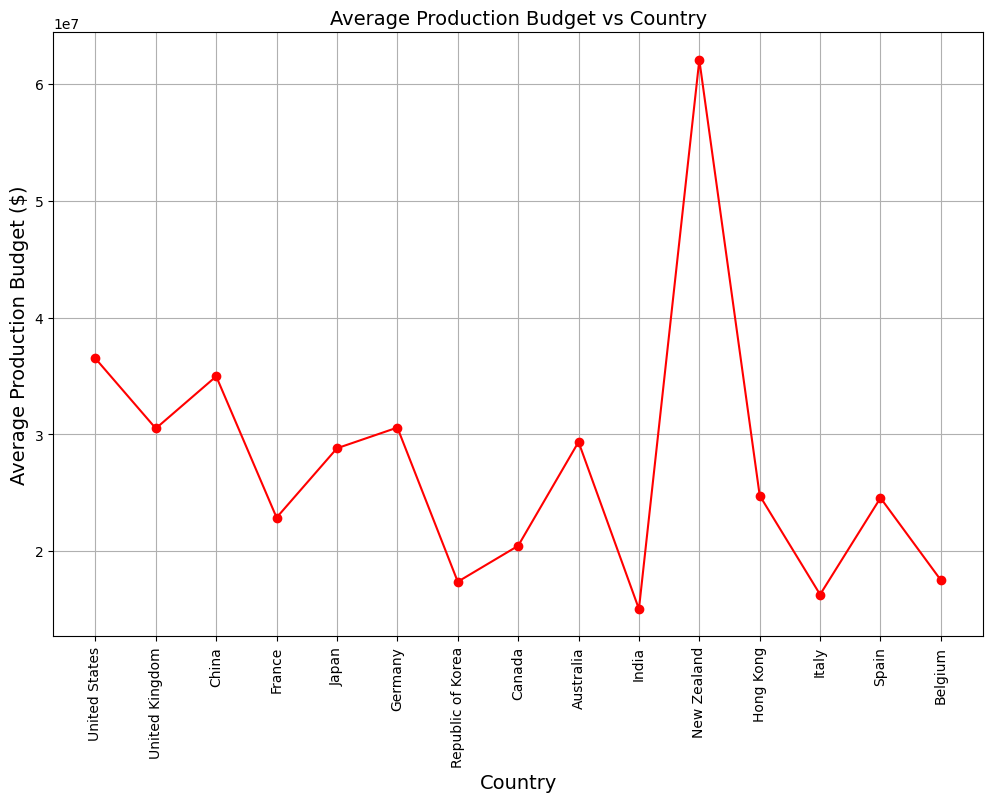

In [269]:
plt.figure(figsize = (12, 8), dpi= 100)
plt.plot(x, country_prod['Average Production Budget ($)'], color='red', marker='o', label = 'Average Production Budget')
plt.title('Average Production Budget vs Country', fontsize = 14)
plt.xlabel("Country", fontsize = 14)
plt.ylabel("Average Production Budget ($)", color="black", fontsize = 14)
plt.xticks(rotation = 90)

plt.grid(True)
plt.show()

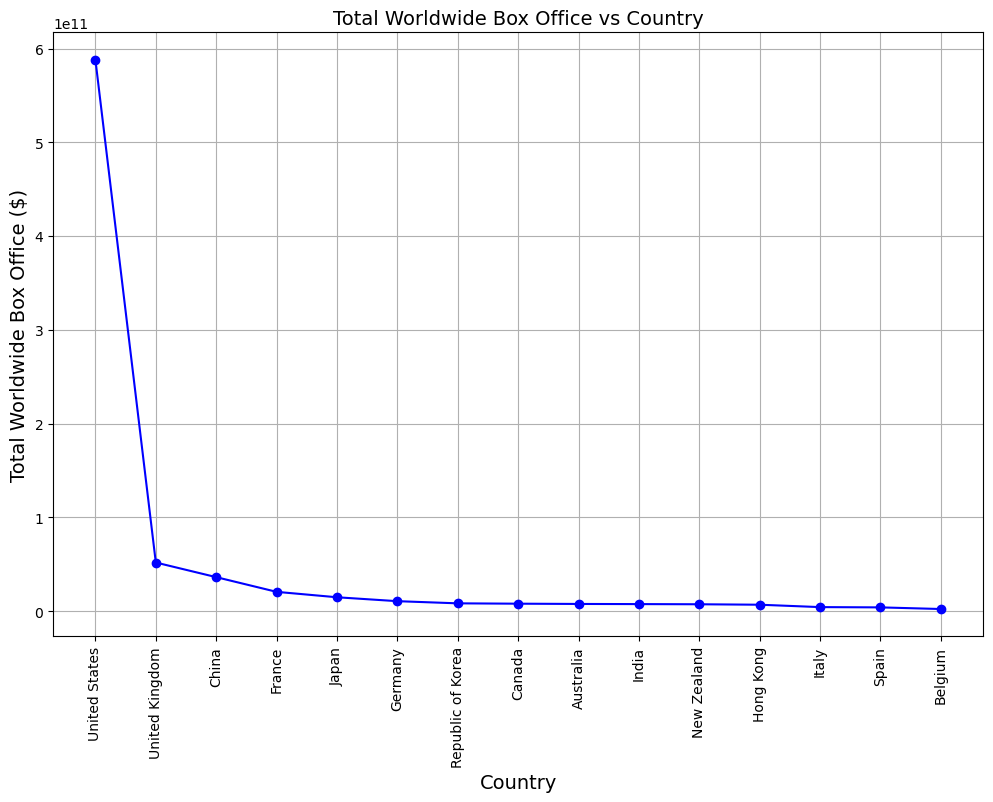

In [268]:
plt.figure(figsize = (12, 8), dpi= 100)
plt.plot(x, country_prod['Total Worldwide Box Office ($)'], color='blue', marker='o', label = 'Total Worldwide Box Office')
plt.title('Total Worldwide Box Office vs Country', fontsize = 14)
plt.xlabel("Country", fontsize = 14)
plt.ylabel("Total Worldwide Box Office ($)", color="black", fontsize = 14)
plt.xticks(rotation = 90)

plt.grid(True)
plt.show()

### 2.2 Annual Sales

In [179]:
csv_file = 'Annual Ticket Sales.csv'
name_list = ['Year', 'Tickets Sold', 'Total Box Office($)', 'Total Inflation Adjusted Box Office($)', 'Average Ticket Price ($)']
annual_sale = making_table(csv_file, 1, 6, name_list)

In [180]:
temp = annual_sale.to_numpy()
annual_sale = spchar_removal(temp, 1, name_list)

In [181]:
annual_sale['Year'] = annual_sale['Year'].astype(int)
annual_sale['Tickets Sold'] = annual_sale['Tickets Sold'].astype(np.int64)
annual_sale['Total Box Office($)'] = annual_sale['Total Box Office($)'].astype(np.int64)
annual_sale['Total Inflation Adjusted Box Office($)'] = annual_sale['Total Inflation Adjusted Box Office($)'].astype(np.int64)
annual_sale['Average Ticket Price ($)'] = annual_sale['Average Ticket Price ($)'].astype(float)
annual_sale.dtypes

Year                                        int32
Tickets Sold                                int64
Total Box Office($)                         int64
Total Inflation Adjusted Box Office($)      int64
Average Ticket Price ($)                  float64
dtype: object

In [182]:
annual_sale

,Year,Tickets Sold,Total Box Office($),Total Inflation Adjusted Box Office($),Average Ticket Price ($)
0,2021,283867868,2600229670,2600229670,9.16
1,2020,223592795,2048111767,2048111767,9.16
2,2019,1228763380,11255475182,11255475283,9.16
3,2018,1311324647,11946170059,12011733786,9.11
4,2017,1225639447,10993988650,11226857340,8.97
5,2016,1301659229,11259355574,11923198539,8.65
6,2015,1323267005,11155143861,12121125772,8.43
7,2014,1257400777,10272967498,11517791114,8.17
8,2013,1339168926,10887446341,12266787382,8.13
9,2012,1380921942,10992141616,12649244986,7.96


In [183]:
max_year = annual_sale.iloc[0]['Year'].astype(int)
min_year = annual_sale.iloc[len(annual_sale) - 1]['Year'].astype(int)

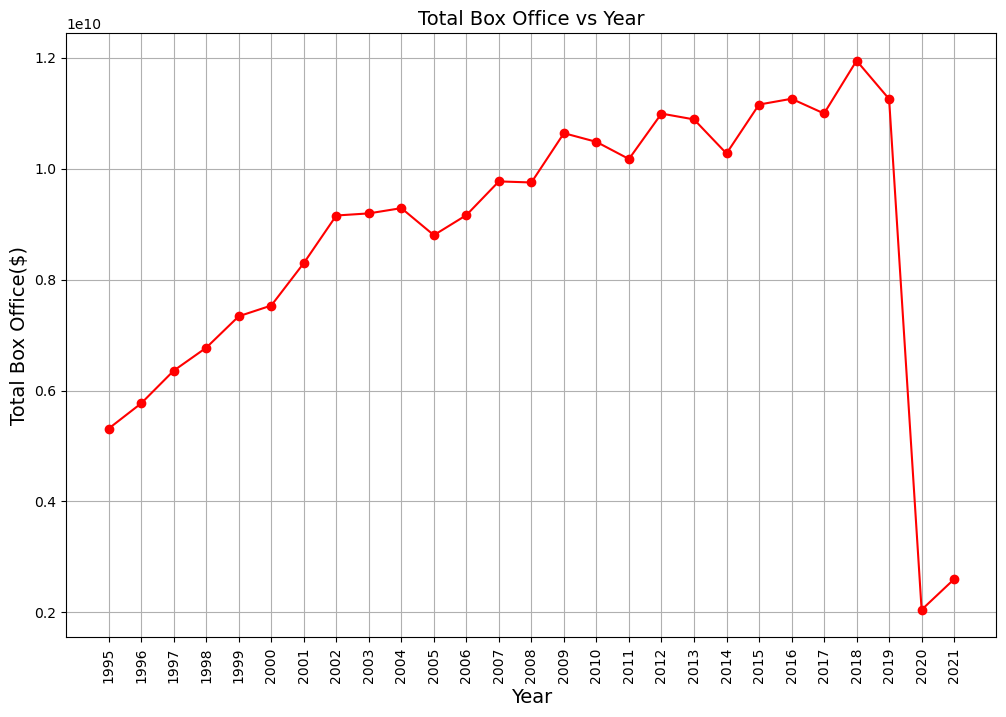

In [240]:
plt.figure(figsize = (12, 8), dpi= 100)
plt.plot(annual_sale['Year'], annual_sale['Total Box Office($)'], color='red', marker='o')
plt.title('Total Box Office vs Year', fontsize = 14)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Total Box Office($)', fontsize = 14)
plt.xticks(np.arange(min_year, max_year + 1, 1), rotation = 90)

plt.grid(True)
plt.show()

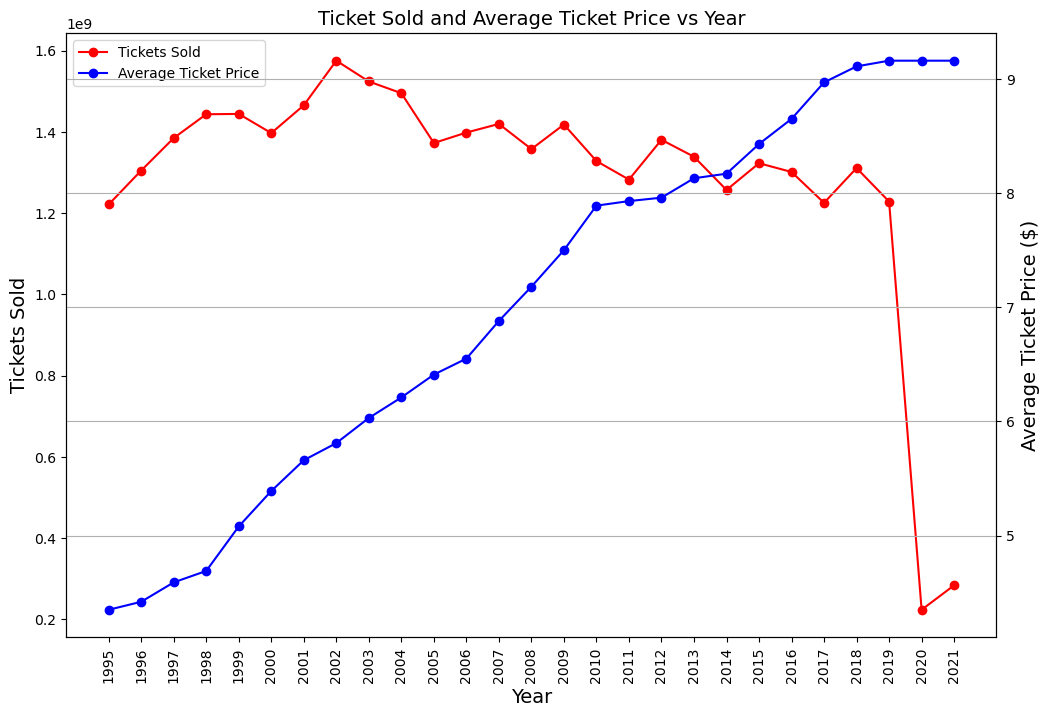

In [241]:
fig, ax = plt.subplots(figsize = (12, 8), dpi= 100)
ins1 = ax.plot(annual_sale['Year'], annual_sale['Tickets Sold'], color='red', marker='o', label = 'Tickets Sold')
ax.set_xlabel("Year", fontsize = 14)
ax.set_ylabel("Tickets Sold", color="black", fontsize = 14)
plt.xticks(np.arange(min_year, max_year + 1, 1), rotation = 90)

ax2=ax.twinx()
ins2 = ax2.plot(annual_sale['Year'], annual_sale['Average Ticket Price ($)'], color='blue', marker='o', label = 'Average Ticket Price')
ax2.set_ylabel("Average Ticket Price ($)", color="black", fontsize = 14)

ins = ins1 + ins2
labs = [l.get_label() for l in ins]
ax.legend(ins, labs, loc = 2)

plt.title('Ticket Sold and Average Ticket Price vs Year', fontsize = 14)
plt.grid(True)
plt.show()

### 2.3 Number of Wide Releases Each Year

In [40]:
csv_file = 'Number of Wide Releases Each Year.csv'
name_list = ['Year', 'Warner Bros', 'Walt Disney', '20th Century Fox', 'Paramount Pictures', 'Sony Pictures', 'Universal', 'Total Major 6', 'Total Other Studios']
distributor_release = making_table(csv_file, 1, 10, name_list)

In [41]:
distributor_release['Year'] = distributor_release['Year'].astype(str)
distributor_release['Warner Bros'] = distributor_release['Warner Bros'].astype(int)
distributor_release['Walt Disney'] = distributor_release['Walt Disney'].astype(int)
distributor_release['20th Century Fox'] = distributor_release['20th Century Fox'].astype(int)
distributor_release['Paramount Pictures'] = distributor_release['Paramount Pictures'].astype(int)
distributor_release['Sony Pictures'] = distributor_release['Sony Pictures'].astype(int)
distributor_release['Universal'] = distributor_release['Universal'].astype(int)
distributor_release['Total Major 6'] = distributor_release['Total Major 6'].astype(int)
distributor_release['Total Other Studios'] = distributor_release['Total Other Studios'].astype(int)
distributor_release.dtypes

Year                   object
Warner Bros             int32
Walt Disney             int32
20th Century Fox        int32
Paramount Pictures      int32
Sony Pictures           int32
Universal               int32
Total Major 6           int32
Total Other Studios     int32
dtype: object

In [42]:
distributor_release = distributor_release.iloc[::-1]
distributor_release

,Year,Warner Bros,Walt Disney,20th Century Fox,Paramount Pictures,Sony Pictures,Universal,Total Major 6,Total Other Studios
26,1995,27,22,11,12,20,17,109,27
25,1996,31,23,13,16,24,13,120,22
24,1997,31,22,12,16,22,11,114,22
23,1998,27,21,11,11,20,16,106,20
22,1999,27,20,15,13,22,16,113,19
21,2000,29,22,13,12,15,13,104,27
20,2001,30,16,16,14,17,10,103,25
19,2002,32,23,15,16,20,13,119,21
18,2003,28,19,13,14,19,13,106,23
17,2004,27,25,18,14,15,14,113,25


In [43]:
temp = []

x = []
temp = distributor_release['Year'].to_numpy()
x = np.append(temp, x)

In [44]:
distributor_release = distributor_release.drop('Year', axis = 1)
distributor_release = distributor_release.drop('Total Major 6', axis = 1)

C:\Users\US\anaconda3\lib\site-packages\pandas\core\generic.py:4147: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [45]:
distributor_percentage = distributor_release.div(distributor_release.sum(axis = 1, numeric_only = True) , axis = 0).multiply(100)

In [46]:
y1 = []
temp = distributor_percentage['Warner Bros'].to_numpy()
y1 = np.append(temp, y1)
y2 = []
temp = distributor_percentage['Walt Disney'].to_numpy()
y2 = np.append(temp, y2)
y3 = []
temp = distributor_percentage['20th Century Fox'].to_numpy()
y3 = np.append(temp, y3)
y4 = []
temp = distributor_percentage['Paramount Pictures'].to_numpy()
y4 = np.append(temp, y4)
y5 = []
temp = distributor_percentage['Sony Pictures'].to_numpy()
y5 = np.append(temp, y5)
y6 = []
temp = distributor_percentage['Universal'].to_numpy()
y6 = np.append(temp, y6)
y7 = []
temp = distributor_percentage['Total Other Studios'].to_numpy()
y7 = np.append(temp, y7)

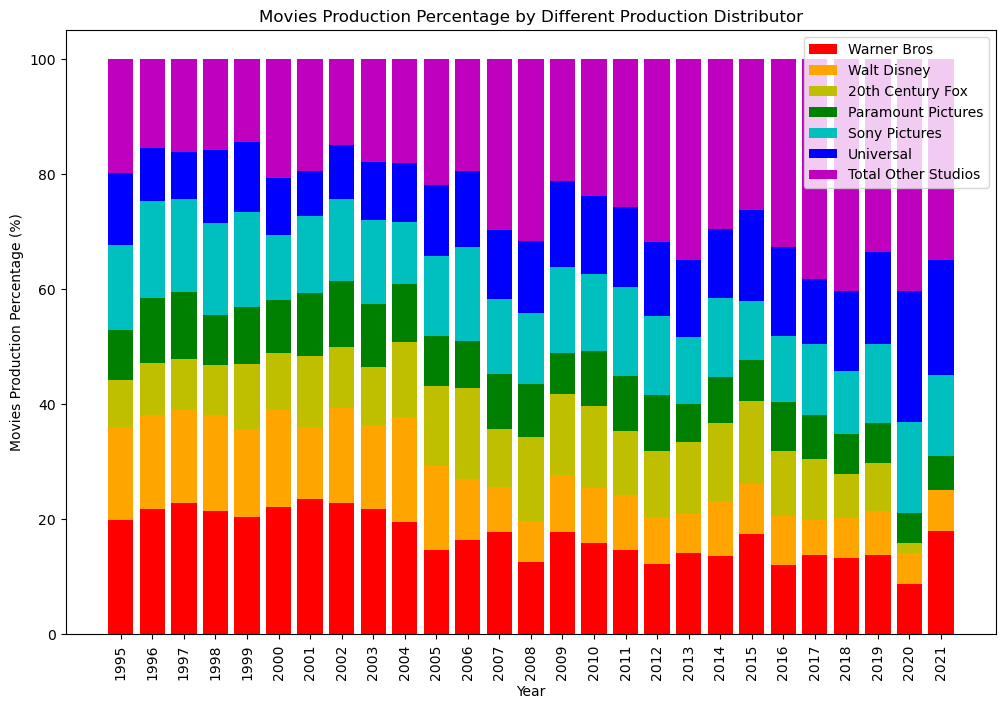

In [52]:
plt.figure(figsize = (12, 8), dpi= 100)
Distributors = ['Warner Bros', 'Walt Disney', '20th Century Fox', 'Paramount Pictures', 'Sony Pictures', 'Universal', 'Total Other Studios']
plt.bar(x, y1, color = 'red')
plt.bar(x, y2, bottom = y1, color = 'orange')
plt.bar(x, y3, bottom = y1+y2, color = 'y')
plt.bar(x, y4, bottom = y1+y2+y3, color = 'g')
plt.bar(x, y5, bottom = y1+y2+y3+y4, color = 'c')
plt.bar(x, y6, bottom = y1+y2+y3+y4+y5, color = 'b')
plt.bar(x, y7, bottom = y1+y2+y3+y4+y5+y6, color = 'm')
plt.xticks(rotation = 90)
plt.legend(Distributors, loc = 'best')
plt.xlabel("Year")
plt.ylabel("Movies Production Percentage (%)")
plt.title("Movies Production Percentage by Different Production Distributor")
plt.show()

### 2.4 Top Movie of Each Year

In [66]:
csv_file = 'Top Movie of Each Year.csv'
name_list = ['Year', 'Movie', 'Creative Type', 'Production Method', 'Source', 'Genre', 'MPAA Rating', 'Distributor', 'Total for Year ($)', 'Total in 2019 ($)', 'Tickets Sold']
movie_best = making_table(csv_file, 1, 12, name_list)

In [67]:
temp = movie_best.to_numpy()
movie_best = spchar_removal(temp, 8, name_list)

In [68]:
movie_best['Year'] = movie_best['Year'].astype(int)
movie_best['Total for Year ($)'] = movie_best['Total for Year ($)'].astype(np.int64)
movie_best['Total in 2019 ($)'] = movie_best['Total in 2019 ($)'].astype(np.int64)
movie_best['Tickets Sold'] = movie_best['Tickets Sold'].astype(np.int64)
movie_best.dtypes

Year                   int32
Movie                 object
Creative Type         object
Production Method     object
Source                object
Genre                 object
MPAA Rating           object
Distributor           object
Total for Year ($)     int64
Total in 2019 ($)      int64
Tickets Sold           int64
dtype: object

In [75]:
movie_best

,Year,Movie,Creative Type,Production Method,Source,Genre,MPAA Rating,Distributor,Total for Year ($),Total in 2019 ($),Tickets Sold
0,1995,Batman Forever,Super Hero,Live Action,Based on Comic/Graphic Novel,Action,PG-13,Warner Bros.,184031112,387522978,42306002
1,1996,Independence Day,Science Fiction,Live Action,Original Screenplay,Adventure,PG-13,20th Century Fox,306169255,634504608,69269062
2,1997,Men in Black,Science Fiction,Live Action,Based on Comic/Graphic Novel,Adventure,PG-13,Sony Pictures,250650052,500207943,54607854
3,1998,Titanic,Historical Fiction,Live Action,Original Screenplay,Drama,PG-13,Paramount Pictures,443319081,865842808,94524324
4,1999,Star Wars Ep. I: The Phantom Menace,Science Fiction,Animation/Live Action,Original Screenplay,Adventure,PG,20th Century Fox,430443350,776153749,84732942
5,2000,How the Grinch Stole Christmas,Kids Fiction,Live Action,Based on Fiction Book/Short Story,Adventure,PG,Universal,253367455,430583644,47006948
6,2001,Harry Potter and the Sorcererâs Stone,Fantasy,Animation/Live Action,Based on Fiction Book/Short Story,Adventure,PG,Warner Bros.,300404434,486166890,53074988
7,2002,Spider-Man,Super Hero,Live Action,Based on Comic/Graphic Novel,Adventure,PG-13,Sony Pictures,403706375,636480273,69484746
8,2003,Finding Nemo,Kids Fiction,Digital Animation,Original Screenplay,Adventure,G,Walt Disney,339714367,516050346,56337374
9,2004,Shrek 2,Kids Fiction,Digital Animation,Based on Fiction Book/Short Story,Adventure,PG,Dreamworks SKG,441226247,650826473,71050925


In [23]:
temp = []
y1 = []
temp = movie_best['Creative Type'].to_numpy()
y1 = np.append(temp, y1)
y2 = []
temp = movie_best['Production Method'].to_numpy()
y2 = np.append(temp, y2)
y3 = []
temp = movie_best['Source'].to_numpy()
y3 = np.append(temp, y3)
y4 = []
temp = movie_best['Genre'].to_numpy()
y4 = np.append(temp, y4)
y5 = []
temp = movie_best['MPAA Rating'].to_numpy()
y5 = np.append(temp, y5)
y6 = []
temp = movie_best['Distributor'].to_numpy()
y6 = np.append(temp, y6)

movie_best_new = pd.DataFrame(list(zip(y1, y2, y3, y4, y5, y6)),
                              columns = ["Creative Type", "Production Method", "Source", "Genre", "MPAA Rating", "Distributor" ])

In [24]:
movie_best_new

,Creative Type,Production Method,Source,Genre,MPAA Rating,Distributor
0,Super Hero,Live Action,Based on Comic/Graphic Novel,Action,PG-13,Warner Bros.
1,Science Fiction,Live Action,Original Screenplay,Adventure,PG-13,20th Century Fox
2,Science Fiction,Live Action,Based on Comic/Graphic Novel,Adventure,PG-13,Sony Pictures
3,Historical Fiction,Live Action,Original Screenplay,Drama,PG-13,Paramount Pictures
4,Science Fiction,Animation/Live Action,Original Screenplay,Adventure,PG,20th Century Fox
5,Kids Fiction,Live Action,Based on Fiction Book/Short Story,Adventure,PG,Universal
6,Fantasy,Animation/Live Action,Based on Fiction Book/Short Story,Adventure,PG,Warner Bros.
7,Super Hero,Live Action,Based on Comic/Graphic Novel,Adventure,PG-13,Sony Pictures
8,Kids Fiction,Digital Animation,Original Screenplay,Adventure,G,Walt Disney
9,Kids Fiction,Digital Animation,Based on Fiction Book/Short Story,Adventure,PG,Dreamworks SKG


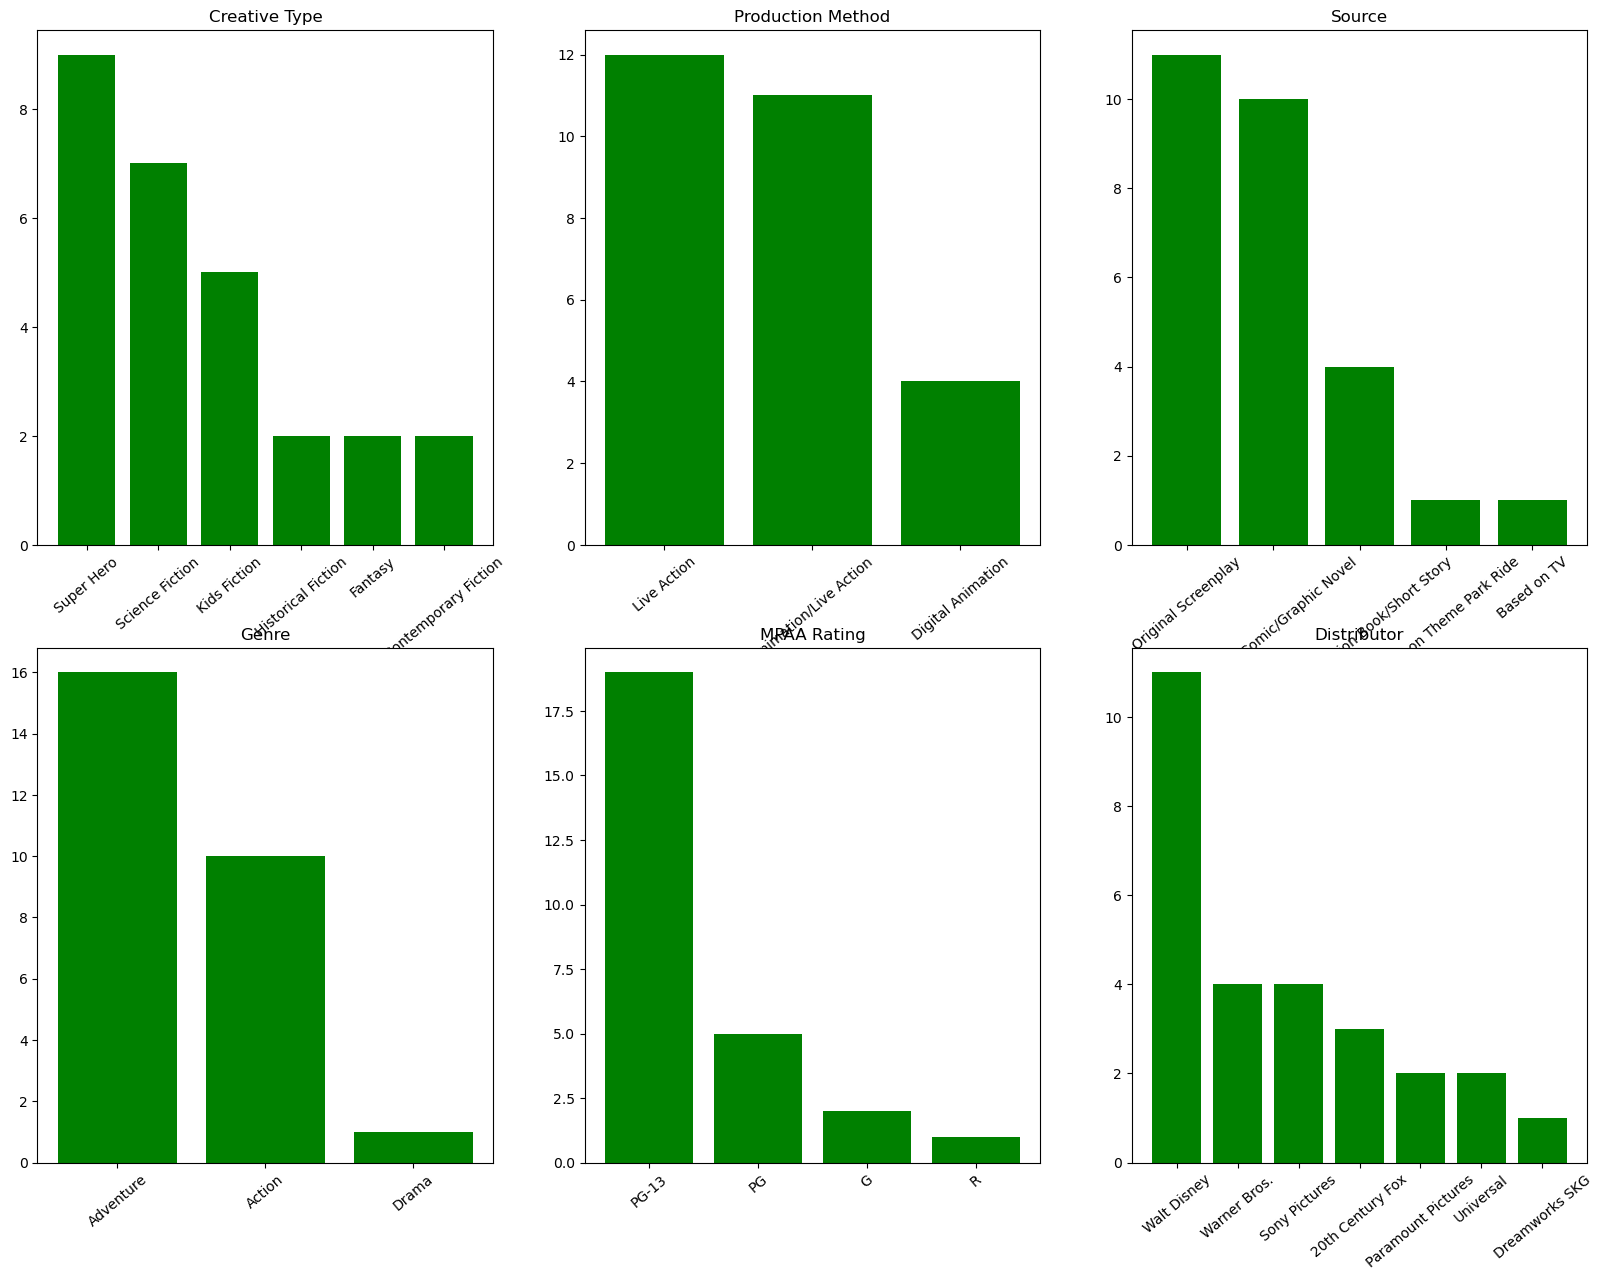

In [54]:
all_columns = ['Creative Type', 'Production Method', 'Source', 'Genre', 'MPAA Rating', 'Distributor']

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 15), dpi= 100)

counter = 0

for all_column in all_columns:
    value_counts = movie_best_new[all_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index, color='g')
    
    axs[trace_x, trace_y].set_title(all_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(20)
    
    counter += 1

plt.show()

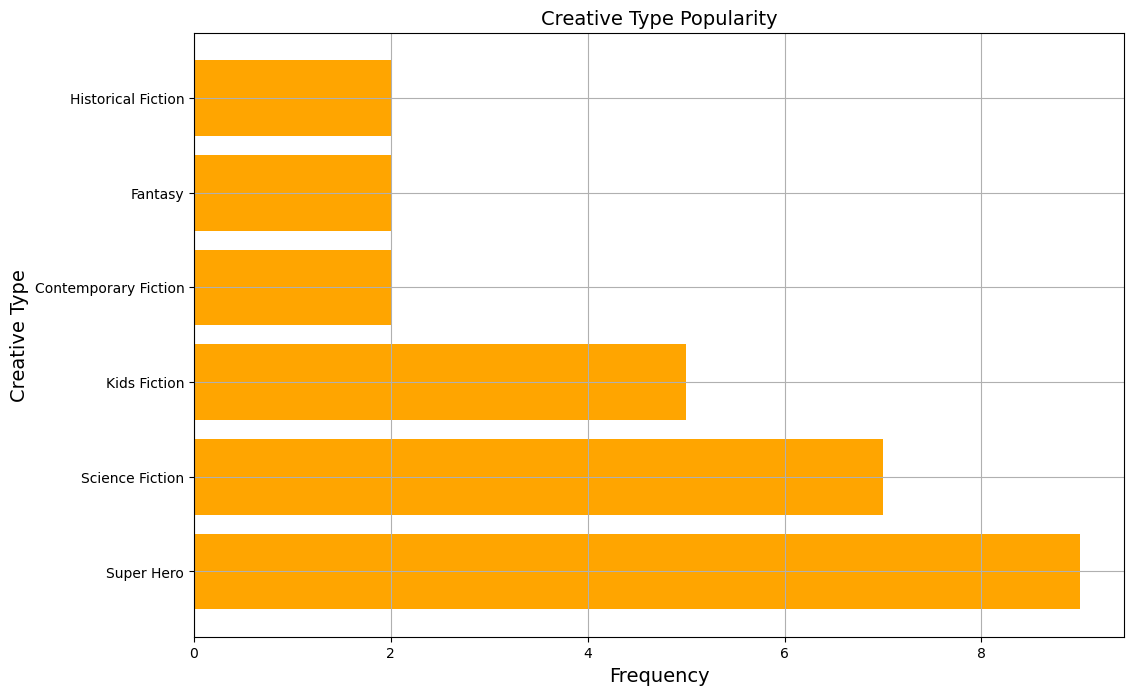

In [347]:
CT = movie_best['Creative Type'].value_counts()
x = ['Super Hero', 'Science Fiction', 'Kids Fiction', 'Contemporary Fiction', 'Fantasy', 'Historical Fiction']

plt.figure(figsize = (12, 8), dpi= 100)
plt.barh(x, CT, color='orange')
plt.title('Creative Type Popularity', fontsize = 14)
plt.xlabel('Frequency', fontsize = 14)
plt.ylabel('Creative Type', fontsize = 14)

plt.grid(True)
plt.show()

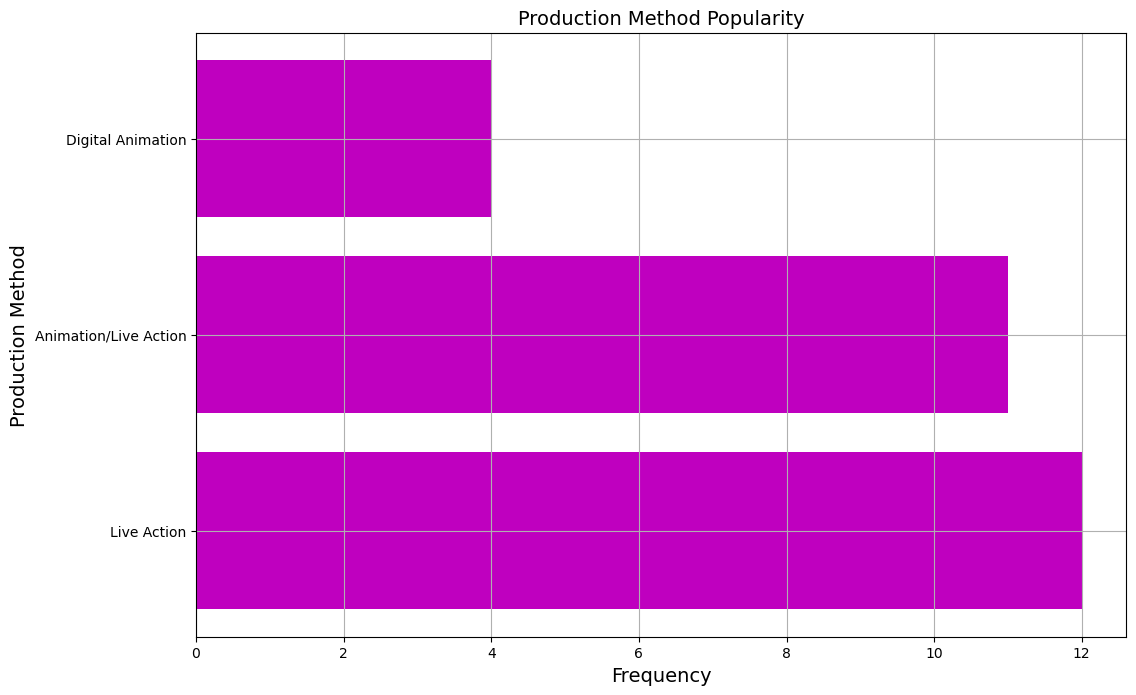

In [346]:
PM = movie_best['Production Method'].value_counts()
x = ['Live Action', 'Animation/Live Action', 'Digital Animation']

plt.figure(figsize = (12, 8), dpi= 100)
plt.barh(x, PM, color='m')
plt.title('Production Method Popularity', fontsize = 14)
plt.xlabel('Frequency', fontsize = 14)
plt.ylabel('Production Method', fontsize = 14)

plt.grid(True)
plt.show()

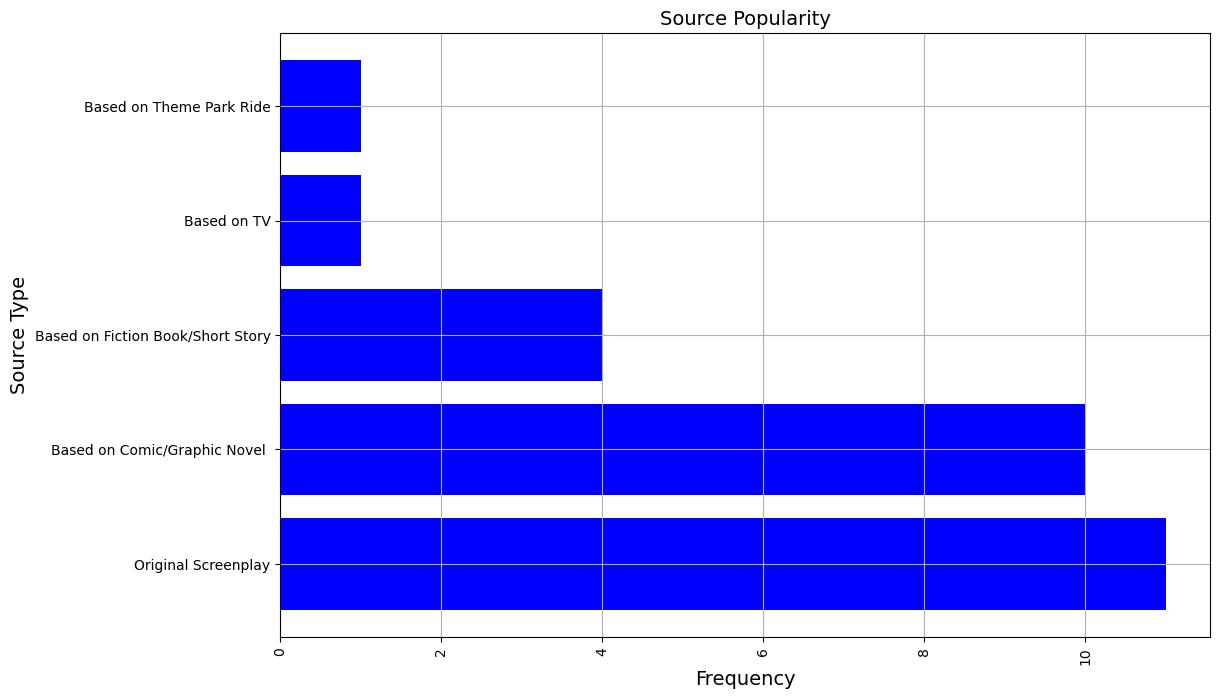

In [345]:
SC = movie_best['Source'].value_counts()
x = ['Original Screenplay', 'Based on Comic/Graphic Novel ', 'Based on Fiction Book/Short Story', 'Based on TV', 'Based on Theme Park Ride']

plt.figure(figsize = (12, 8), dpi= 100)
plt.barh(x, SC, color='b')
plt.title('Source Popularity', fontsize = 14)
plt.xlabel('Frequency', fontsize = 14)
plt.ylabel('Source Type', fontsize = 14)
plt.xticks(rotation = 90)

plt.grid(True)
plt.show()

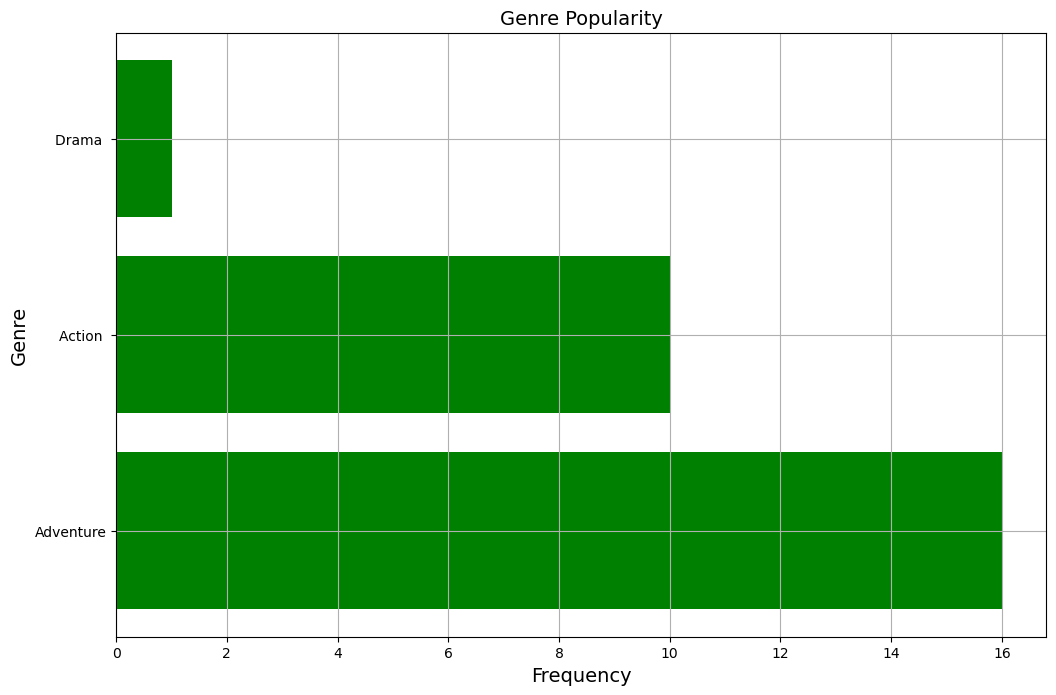

In [344]:
GN = movie_best['Genre'].value_counts()
x = ['Adventure', 'Action ', 'Drama ']

plt.figure(figsize = (12, 8), dpi= 100)
plt.barh(x, GN, color = 'g')
plt.title('Genre Popularity', fontsize = 14)
plt.xlabel('Frequency', fontsize = 14)
plt.ylabel('Genre', fontsize = 14)

plt.grid(True)
plt.show()

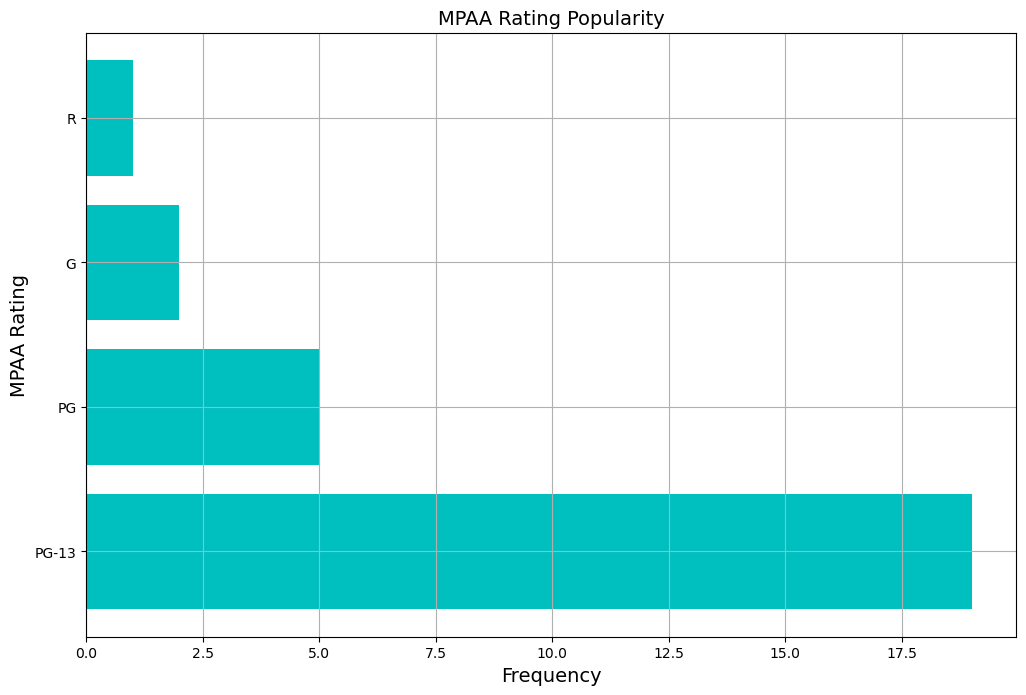

In [343]:
MP = movie_best['MPAA Rating'].value_counts()
x = ['PG-13', 'PG', 'G', 'R']

plt.figure(figsize = (12, 8), dpi= 100)
plt.barh(x, MP, color = 'c')
plt.title('MPAA Rating Popularity', fontsize = 14)
plt.xlabel('Frequency', fontsize = 14)
plt.ylabel('MPAA Rating', fontsize = 14)

plt.grid(True)
plt.show()

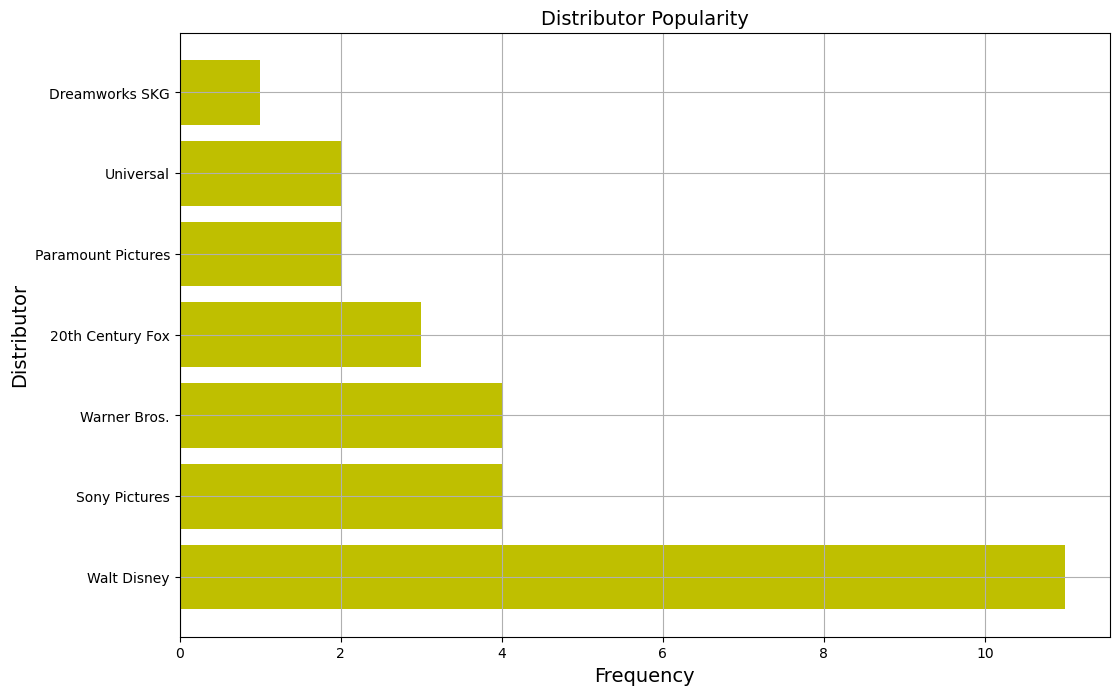

In [342]:
DT = movie_best['Distributor'].value_counts()
x = ['Walt Disney', 'Sony Pictures', 'Warner Bros.', '20th Century Fox', 'Paramount Pictures', 'Universal', 'Dreamworks SKG']

plt.figure(figsize = (12, 8), dpi= 100)
plt.barh(x, DT, color = 'y')
plt.title('Distributor Popularity', fontsize = 14)
plt.xlabel('Frequency', fontsize = 14)
plt.ylabel('Distributor', fontsize = 14)

plt.grid(True)
plt.show()

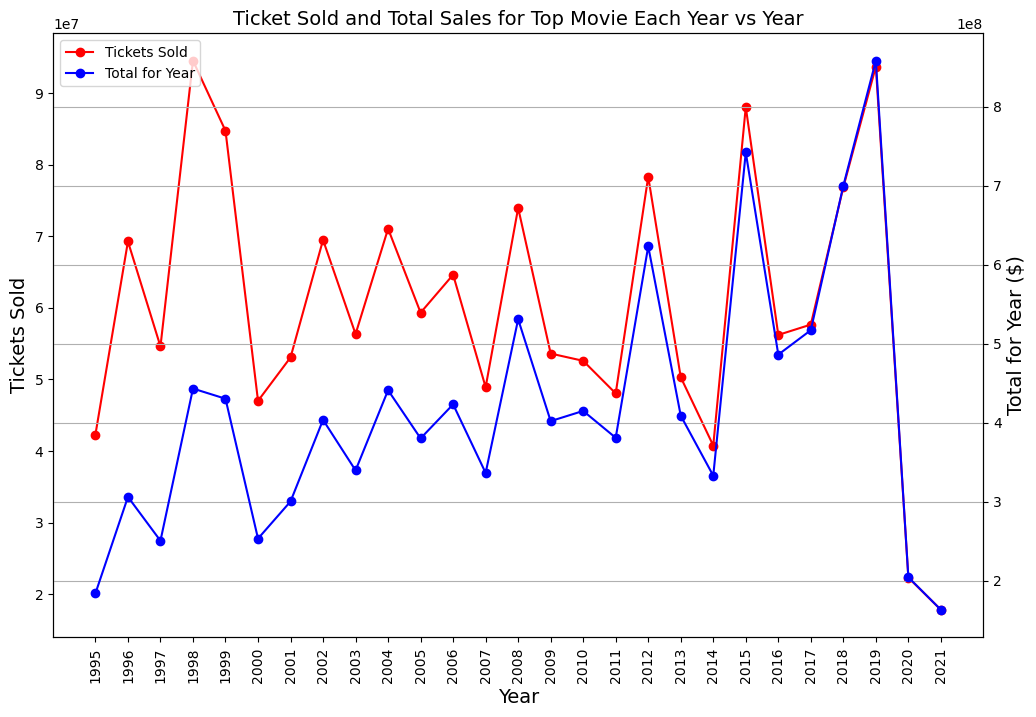

In [80]:
x1 = []
temp = movie_best['Year'].to_numpy()
x1 = np.append(temp, x1)

max_year = x1[-1]
min_year = x1[0]

fig, ax = plt.subplots(figsize = (12, 8), dpi= 100)
ins1 = ax.plot(x1, movie_best['Tickets Sold'], color='red', marker='o', label = 'Tickets Sold')
ax.set_xlabel("Year", fontsize = 14)
ax.set_ylabel("Tickets Sold", color="black", fontsize = 14)
plt.xticks(np.arange(min_year, max_year + 1, 1), rotation = 90)

ax2=ax.twinx()
ins2 = ax2.plot(x1, movie_best['Total for Year ($)'], color='blue', marker='o', label = 'Total for Year')
ax2.set_ylabel("Total for Year ($)", color="black", fontsize = 14)

ins = ins1 + ins2
labs = [l.get_label() for l in ins]
ax.legend(ins, labs, loc = 2)

plt.title('Ticket Sold and Total Sales for Top Movie Each Year vs Year', fontsize = 14)
plt.grid(True)
plt.show()

In [77]:
x1[-1]

2021.0

### 2.5 Top-Grossing Distributors

In [98]:
csv_file = 'Top-Grossing Distributors 1995 to 2021.csv'
name_list = ['Rank', 'Distributor', 'Number of Movies', 'Total Gross ($)', 'Average Gross ($)', 'Market Share (%)']
distributor_gross = making_table(csv_file, 0, 6, name_list)

In [99]:
temp = distributor_gross.to_numpy()
distributor_gross = spchar_removal(temp, 3, name_list)

In [100]:
distributor_gross['Rank'] = distributor_gross['Rank'].astype(int)
distributor_gross['Number of Movies'] = distributor_gross['Number of Movies'].astype(np.int64)
distributor_gross['Total Gross ($)'] = distributor_gross['Total Gross ($)'].astype(np.int64)
distributor_gross['Average Gross ($)'] = distributor_gross['Average Gross ($)'].astype(np.int64)
distributor_gross['Market Share (%)'] = distributor_gross['Market Share (%)'].astype(float)
distributor_gross.dtypes

Rank                   int32
Distributor           object
Number of Movies       int64
Total Gross ($)        int64
Average Gross ($)      int64
Market Share (%)     float64
dtype: object

In [101]:
distributor_gross

,Rank,Distributor,Number of Movies,Total Gross ($),Average Gross ($),Market Share (%)
0,1,Walt Disney,585,39993747962,68365381,16.94
1,2,Warner Bros.,817,36066752973,44145352,15.27
2,3,Sony Pictures,742,28868612056,38906485,12.22
3,4,Universal,531,27870357164,52486548,11.80
4,5,20th Century Fox,525,25857839756,49253028,10.95
5,6,Paramount Pictures,490,24409597849,49815506,10.34
6,7,Lionsgate,423,9621856461,22746706,4.07
7,8,New Line,208,6195218024,29784702,2.62
8,9,Dreamworks SKG,77,4278649271,55566874,1.81
9,10,Miramax,384,3835978908,9989528,1.62


In [102]:
temp = []

x = []
temp = distributor_gross['Total Gross ($)'].to_numpy()
x = np.append(temp, x)
y = []
temp = distributor_gross['Distributor'].to_numpy()
y = np.append(temp, y)

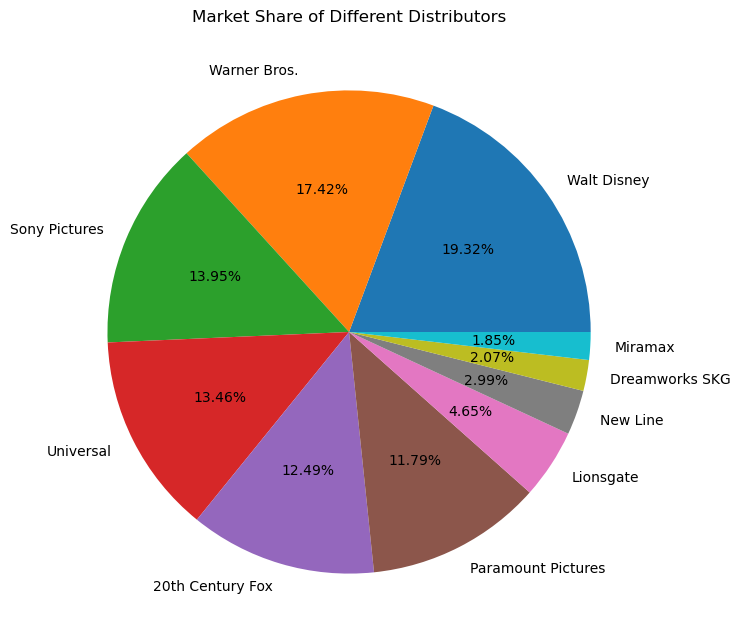

In [103]:
plt.figure(figsize = (12, 8), dpi= 100)
plt.pie(x, labels = y, autopct = make_autopct(x))
plt.title('Market Share of Different Distributors')
plt.show()

### 2.6 Top-Grossing Genres

In [92]:
csv_file = 'Top-Grossing Genres 1995 to 2021.csv'
name_list = ['Rank', 'Genre', 'Number of Movies', 'Total Box Office ($)', 'Tickets', 'Market Share(%)']
genre_sales = making_table(csv_file, 1, 7, name_list)

In [93]:
temp = genre_sales.to_numpy()
genre_sales = spchar_removal(temp, 2, name_list)

In [94]:
genre_sales['Rank'] = genre_sales['Rank'].astype(int)
genre_sales['Number of Movies'] = genre_sales['Number of Movies'].astype(np.int64)
genre_sales['Total Box Office ($)'] = genre_sales['Total Box Office ($)'].astype(np.int64)
genre_sales['Tickets'] = genre_sales['Tickets'].astype(np.int64)
genre_sales['Market Share(%)'] = genre_sales['Market Share(%)'].astype(float)
genre_sales.dtypes

Rank                      int32
Genre                    object
Number of Movies          int64
Total Box Office ($)      int64
Tickets                   int64
Market Share(%)         float64
dtype: object

In [95]:
genre_sales

,Rank,Genre,Number of Movies,Total Box Office ($),Tickets,Market Share(%)
0,1,Adventure,1092,64221253338,9181864659,27.19
1,2,Action,1080,48307013591,6803430085,20.46
2,3,Drama,5449,35736879470,5474284313,15.13
3,4,Comedy,2403,33753185766,5174226947,14.29
4,5,Thriller/Suspense,1177,19814602911,2880854066,8.39
5,6,Horror,697,13065165497,1872998865,5.53
6,7,Romantic Comedy,623,10419075288,1683618047,4.41
7,8,Musical,200,4278156062,566825406,1.81
8,9,Documentary,2392,2504006856,374404514,1.06
9,10,Black Comedy,212,2162385384,314884539,0.92


In [96]:
temp = []

x = []
temp = genre_sales['Total Box Office ($)'].to_numpy()
x = np.append(temp, x)
y = []
temp = genre_sales['Genre'].to_numpy()
y = np.append(temp, y)

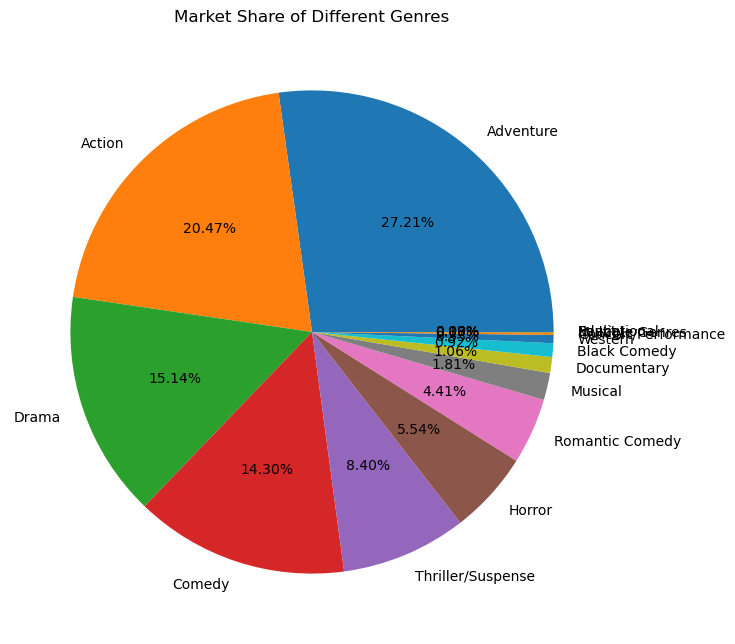

In [97]:
plt.figure(figsize = (12, 8), dpi= 100)
plt.pie(x, labels = y, autopct = make_autopct(x))
plt.title('Market Share of Different Genres')
plt.show()

### 2.7 Top-Grossing MPAA Rating

In [86]:
csv_file = 'Top-Grossing MPAA Ratings 1995 to 2021.csv'
name_list = ['Rank', 'MPAA Rating', 'Number of Movies', 'Total Gross ($)', 'Average Gross ($)', 'Market Share (%)']
MPAA_sales = making_table(csv_file, 0, 6, name_list)

In [87]:
temp = MPAA_sales.to_numpy()
MPAA_sales = spchar_removal(temp, 2, name_list)

In [88]:
MPAA_sales['Rank'] = MPAA_sales['Rank'].astype(int)
MPAA_sales['Number of Movies'] = MPAA_sales['Number of Movies'].astype(np.int64)
MPAA_sales['Total Gross ($)'] = MPAA_sales['Total Gross ($)'].astype(np.int64)
MPAA_sales['Average Gross ($)'] = MPAA_sales['Average Gross ($)'].astype(np.int64)
MPAA_sales['Market Share (%)'] = MPAA_sales['Market Share (%)'].astype(float)
MPAA_sales.dtypes

Rank                   int32
MPAA Rating           object
Number of Movies       int64
Total Gross ($)        int64
Average Gross ($)      int64
Market Share (%)     float64
dtype: object

In [89]:
MPAA_sales

,Rank,MPAA Rating,Number of Movies,Total Gross ($),Average Gross ($),Market Share (%)
0,1,PG-13,3219,112354063698,34903406,47.58
1,2,R,5442,63248804985,11622346,26.78
2,3,PG,1524,48996425356,32149885,20.75
3,4,G,393,9523489949,24232799,4.03
4,5,Not Rated,5820,1918348998,329613,0.81
5,6,NC-17,24,44850139,1868756,0.02
6,7,Open,5,5489687,1097937,0.00
7,8,GP,7,552618,78945,0.00


In [90]:
temp = []

x = []
temp = MPAA_sales['Total Gross ($)'].to_numpy()
x = np.append(temp, x)
y = []
temp = MPAA_sales['MPAA Rating'].to_numpy()
y = np.append(temp, y)

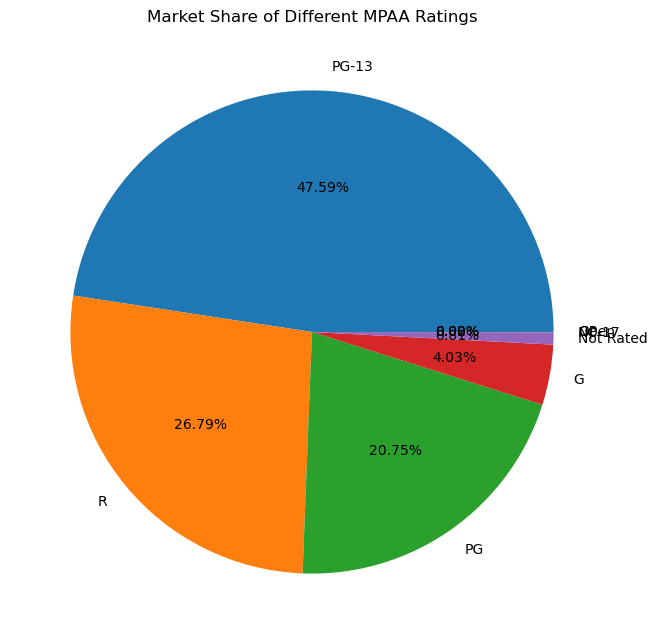

In [91]:
plt.figure(figsize = (12, 8), dpi= 100)
plt.pie(x, labels = y, autopct = make_autopct(x))
plt.title('Market Share of Different MPAA Ratings')
plt.show()

### 2.8 Top-Grossing Sources

In [50]:
csv_file = 'Top-Grossing Sources 1995 to 2021.csv'
name_list = ['Rank', 'Source', 'Number of Movies', 'Total Gross ($)', 'Average Gross ($)', 'Market Share (%)']
source_sales = making_table(csv_file, 0, 6, name_list)

In [51]:
temp = source_sales.to_numpy()
source_sales = spchar_removal(temp, 2, name_list)

In [52]:
source_sales['Rank'] = source_sales['Rank'].astype(int)
source_sales['Number of Movies'] = source_sales['Number of Movies'].astype(np.int64)
source_sales['Total Gross ($)'] = source_sales['Total Gross ($)'].astype(np.int64)
source_sales['Average Gross ($)'] = source_sales['Average Gross ($)'].astype(np.int64)
source_sales['Market Share (%)'] = source_sales['Market Share (%)'].astype(float)
source_sales.dtypes

Rank                   int32
Source                object
Number of Movies       int64
Total Gross ($)        int64
Average Gross ($)      int64
Market Share (%)     float64
dtype: object

In [53]:
source_sales

,Rank,Source,Number of Movies,Total Gross ($),Average Gross ($),Market Share (%)
0,1,Original Screenplay,7870,105886403851,13454435,44.84
1,2,Based on Fiction Book/Short Story,2134,46818625428,21939375,19.83
2,3,Based on Comic/Graphic Novel,243,22920061307,94321240,9.71
3,4,Remake,329,12853228289,39067563,5.44
4,5,Based on Real Life Events,3196,11350566056,3551491,4.81
5,6,Based on TV,228,11201233390,49128217,4.74
6,7,Based on Factual Book/Article,288,7399822102,25693827,3.13
7,8,Spin-Off,40,3631972751,90799319,1.54
8,9,Based on Folk Tale/Legend/Fairytale,77,3388945174,44012275,1.44
9,10,Based on Play,270,2111079928,7818815,0.89


In [84]:
temp = []

x = []
temp = source_sales['Total Gross ($)'].to_numpy()
x = np.append(temp, x)
y = []
temp = source_sales['Source'].to_numpy()
y = np.append(temp, y)

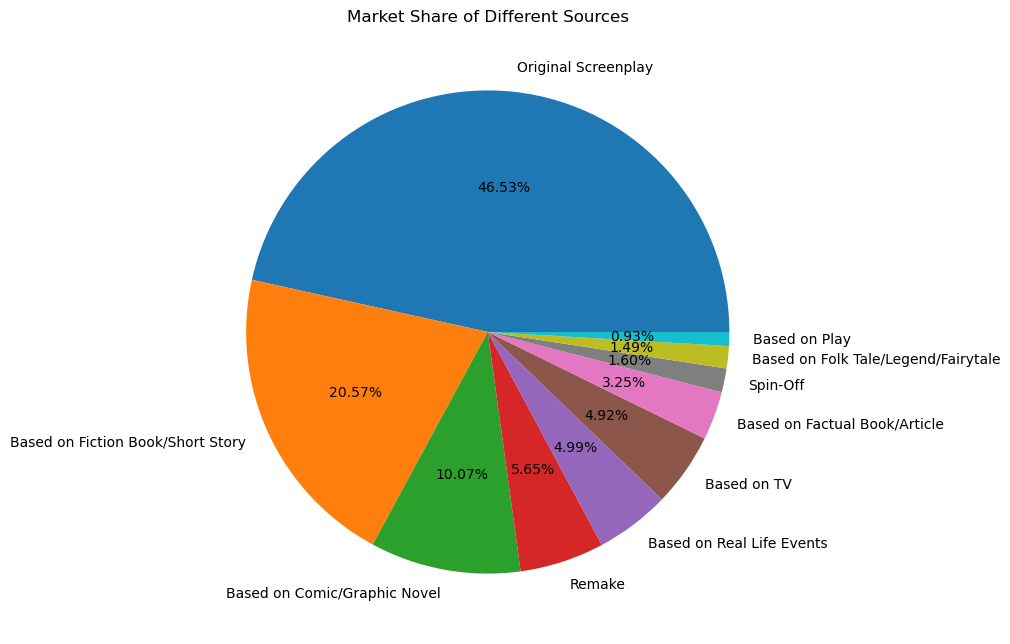

In [85]:
plt.figure(figsize = (12, 8), dpi= 100)
plt.pie(x, labels = y, autopct = make_autopct(x))
plt.title('Market Share of Different Sources')
plt.show()

### 2.9 Top-Grossing Production Methods

In [39]:
csv_file = 'Top-Grossing Production Methods 1995 to 2021.csv'
name_list = ['Rank', 'Production Method', 'Number of Movies', 'Total Gross ($)', 'Average Gross ($)', 'Market Share (%)']
methods_sales = making_table(csv_file, 0, 6, name_list)

In [40]:
temp = methods_sales.to_numpy()
methods_sales = spchar_removal(temp, 2, name_list)

In [41]:
methods_sales['Rank'] = methods_sales['Rank'].astype(int)
methods_sales['Number of Movies'] = methods_sales['Number of Movies'].astype(np.int64)
methods_sales['Total Gross ($)'] = methods_sales['Total Gross ($)'].astype(np.int64)
methods_sales['Average Gross ($)'] = methods_sales['Average Gross ($)'].astype(np.int64)
methods_sales['Market Share (%)'] = methods_sales['Market Share (%)'].astype(float)
methods_sales.dtypes

Rank                   int32
Production Method     object
Number of Movies       int64
Total Gross ($)        int64
Average Gross ($)      int64
Market Share (%)     float64
dtype: object

In [42]:
methods_sales

,Rank,Production Method,Number of Movies,Total Gross ($),Average Gross ($),Market Share (%)
0,1,Live Action,14483,178535628796,12327255,75.60
1,2,Animation/Live Action,261,29988285098,114897644,12.70
2,3,Digital Animation,357,23769198856,66580389,10.07
3,4,Hand Animation,163,2960124318,18160272,1.25
4,5,Stop-Motion Animation,37,676178232,18275087,0.29
5,6,Multiple Production Methods,26,43728300,1681858,0.02
6,7,Rotoscoping,4,8468385,2117096,0.00


In [80]:
temp = []

x = []
temp = methods_sales['Total Gross ($)'].to_numpy()
x = np.append(temp, x)
y = []
temp = methods_sales['Production Method'].to_numpy()
y = np.append(temp, y)

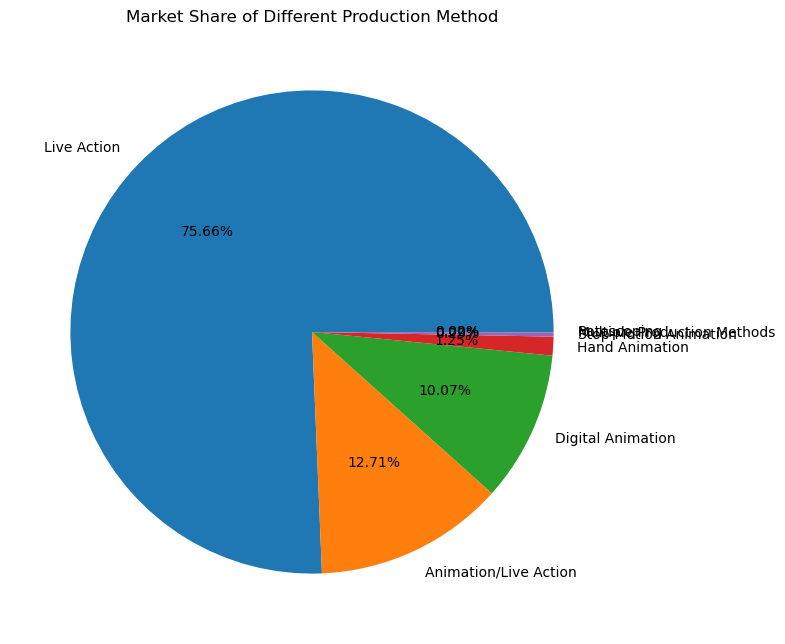

In [81]:
plt.figure(figsize = (12, 8), dpi= 100)
plt.pie(x, labels = y, autopct = make_autopct(x))
plt.title('Market Share of Different Production Method')
plt.show()

### 2.10 Top-Grossing Creative Types

In [25]:
csv_file = 'Top-Grossing Creative Types 1995 to 2021.csv'
name_list = ['Rank', 'Creative Type', 'Number of Movies', 'Total Gross ($)', 'Average Gross ($)', 'Market Share (%)']
creative_sales = making_table(csv_file, 0, 6, name_list)

In [26]:
temp = creative_sales.to_numpy()
creative_sales = spchar_removal(temp, 2, name_list)

In [27]:
creative_sales['Rank'] = creative_sales['Rank'].astype(int)
creative_sales['Number of Movies'] = creative_sales['Number of Movies'].astype(np.int64)
creative_sales['Total Gross ($)'] = creative_sales['Total Gross ($)'].astype(np.int64)
creative_sales['Average Gross ($)'] = creative_sales['Average Gross ($)'].astype(np.int64)
creative_sales['Market Share (%)'] = creative_sales['Market Share (%)'].astype(float)
creative_sales.dtypes

Rank                   int32
Creative Type         object
Number of Movies       int64
Total Gross ($)        int64
Average Gross ($)      int64
Market Share (%)     float64
dtype: object

In [28]:
creative_sales

,Rank,Creative Type,Number of Movies,Total Gross ($),Average Gross ($),Market Share (%)
0,1,Contemporary Fiction,7370,95700568803,12985152,40.52
1,2,Kids Fiction,557,31850619723,57182441,13.49
2,3,Science Fiction,711,29665649633,41723839,12.56
3,4,Fantasy,758,21763912794,28712286,9.22
4,5,Super Hero,124,19655640701,158513231,8.32
5,6,Historical Fiction,1473,18491377759,12553549,7.83
6,7,Dramatization,1166,15671323248,13440243,6.64
7,8,Factual,2445,2944893936,1204456,1.25
8,9,Multiple Creative Types,40,117489266,2937232,0.05


In [82]:
temp = []

x = []
temp = creative_sales['Total Gross ($)'].to_numpy()
x = np.append(temp, x)
y = []
temp = creative_sales['Creative Type'].to_numpy()
y = np.append(temp, y)

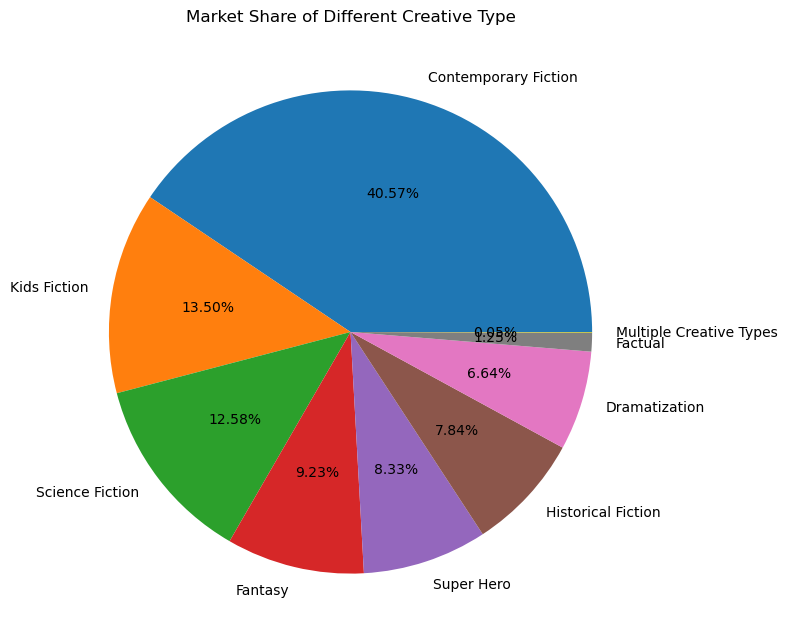

In [83]:
plt.figure(figsize = (12, 8), dpi= 100)
plt.pie(x, labels = y, autopct = make_autopct(x))
plt.title('Market Share of Different Creative Type')
plt.show()